<h1 align = "center">Outlier Analysis and Detection</h1>

### What are outliers in the data?

#### Definition

An outlier is an observation that lies an abnormal distance from other values in a random sample from a population. In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal. Before abnormal observations can be singled out, it is necessary to characterize normal observations.

#### Ways to describe data

Two activities are essential for characterizing a set of data:

1. Examination of the overall shape of the graphed data for important features, including symmetry and departures from assumptions. The chapter on Exploratory Data Analysis (EDA) discusses assumptions and summarization of data in detail.

2. Examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots.

#### Box plot construction

The box plot is a useful graphical display for describing the behavior of the data in the middle as well as at the ends of the distributions. The box plot uses the median and the lower and upper quartiles (defined as the 25th and 75th percentiles). If the lower quartile is Q1 and the upper quartile is Q3, then the difference (Q3 - Q1) is called the interquartile range or IQ.

#### Box plots with fences

A box plot is constructed by drawing a box between the upper and lower quartiles with a solid line drawn across the box to locate the median. The following quantities (called fences) are needed for identifying extreme values in the tails of the distribution:
1. lower inner fence: Q1 - 1.5*IQ
2. upper inner fence: Q3 + 1.5*IQ
3. lower outer fence: Q1 - 3*IQ
4. upper outer fence: Q3 + 3*IQ

#### Outlier detection criteria

A point beyond an inner fence on either side is considered a mild outlier. A point beyond an outer fence is considered an extreme outlier.

#### Outliers may contain important information

Outliers should be investigated carefully. Often they contain valuable information about the process under investigation or the data gathering and recording process. Before considering the possible elimination of these points from the data, one should try to understand why they appeared and whether it is likely similar values will continue to appear. Of course, outliers are often bad data points.

#### Causes of outliers in a dataset

<ul>
<li>Data entry errors (human errors)
<li>Measurement errors (instrument errors)
<li>Experimental errors (data extraction or experiment planning/executing errors)
<li>Intentional (dummy outliers made to test detection methods)
<li>Data processing errors (data manipulation or data set unintended mutations)
<li>Sampling errors (extracting or mixing data from wrong or various sources)
<li>Natural (not an error, novelties in data)
</ul>

In the process of producing, collecting, processing and analyzing data, outliers can come from many sources and hide in many dimensions. Those that are not a product of an error are called novelties.
Detecting outliers is of major importance for almost any quantitative discipline (ie: Physics, Economy, Finance, Machine Learning, Cyber Security). In machine learning and in any quantitative discipline the quality of data is as important as the quality of a prediction or classification model.

There are varioius techniques that are used for Outlier Detection Problems like:
<ul>
<li>Numeric Outlier
<li>Z-Score or Extreme Value Analysis (parametric)
<li>DBSCAN
<li>Isolation Forest
<li>Probabilistic and Statistical Modeling (parametric)
<li>Linear Regression Models (PCA, LMS)
<li>Proximity Based Models (non-parametric)
<li>Information Theory Models
<li>High Dimensional Outlier Detection Methods (high dimensional sparse data)    
</ul>    

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Load the given data set into data

In [59]:
excel_file = pd.ExcelFile('data.xlsx') # Provided excel file
fields_summary = pd.read_excel(excel_file, 'fields summary') # Sheet 1 with fields summary
data = pd.read_excel(excel_file, 'data') # Sheet 2 with the required dataset
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,...,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,...,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,48233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,74368,4.0


Load the cleaned data into the dataframe df

In [56]:
df = pd.read_csv('clean_df.csv')
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOil,engineTransmission_engine_value,engineTransmission_coolant_value,engineTransmission_engineMounting_value,engineTransmission_engineSound_value,engineTransmission_exhaustSmoke_value,engineTransmission_engineBlowByBackCompression_value,engineTransmission_clutch_value,engineTransmission_gearShifting_value,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,0,1,0,0,0,0,0,0,0,0,1,Petrol + CNG,0.124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,1,1,0,0,0,1,0,0,1,1,1,Petrol + CNG,0.078108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,1,1,0,1,0,0,0,0,1,0,1,Diesel,0.093348,3.5
3,aj_04,2019-01-18 11:02:53,2013,1,1,1,0,1,0,1,1,1,1,0,1,Petrol + CNG,0.048233,3.5
4,aj_05,2019-01-27 12:12:06,2011,7,1,1,0,0,1,0,0,0,1,0,1,Petrol + CNG,0.074368,4.0


Check datatypes for both the datasets

In [62]:
print(data.dtypes)

appointmentId                                  object
inspectionStartTime                    datetime64[ns]
year                                            int64
month                                           int64
engineTransmission_battery_value               object
                                            ...      
engineTransmission_comments_value_3            object
engineTransmission_comments_value_4            object
fuel_type                                      object
odometer_reading                                int64
rating_engineTransmission                     float64
Length: 73, dtype: object


In [63]:
print(df.dtypes)

appointmentId                                            object
inspectionStartTime                                      object
year                                                      int64
month                                                     int64
engineTransmission_battery_value                          int64
engineTransmission_engineoilLevelDipstick_value           int64
engineTransmission_engineOil                              int64
engineTransmission_engine_value                           int64
engineTransmission_coolant_value                          int64
engineTransmission_engineMounting_value                   int64
engineTransmission_engineSound_value                      int64
engineTransmission_exhaustSmoke_value                     int64
engineTransmission_engineBlowByBackCompression_value      int64
engineTransmission_clutch_value                           int64
engineTransmission_gearShifting_value                     int64
fuel_type                               

Look at the box plots of the relevant varibales

Boxplot for odometer_reading

<AxesSubplot:xlabel='odometer_reading'>

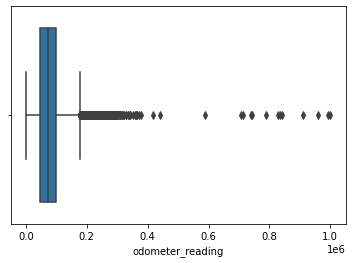

In [80]:
sns.boxplot(data['odometer_reading'])

This plot clearly depicts that the values greater than approximately the 1.8 times the max values of "odemeter_reading" falls in the category of outliers.
We can adjust these values by removing the rows with the values greater than "1.8 * data['odometer_reading'].max()".

Boxplot for rating_engineTransmission

<AxesSubplot:xlabel='rating_engineTransmission'>

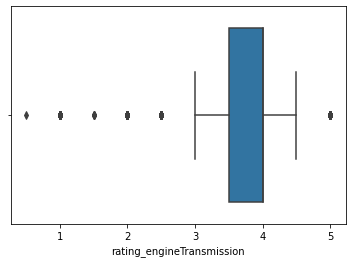

In [81]:
sns.boxplot(data['rating_engineTransmission'])

This plot clearly depicts that the values greater than 4.5 and lower than 3 of "rating_engineTransmission" falls in the category of outliers.
We can adjust these values by removing the rows with the values less than 3 and greater than 4.5.

<AxesSubplot:xlabel='odometer_reading'>

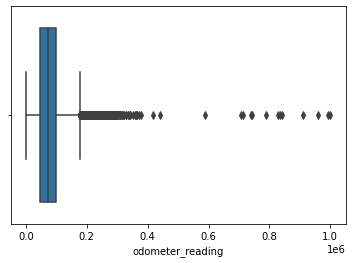

In [35]:
sns.boxplot(data['odometer_reading'])

It is not necessary to always remove outliers from the data as sometimes they can convey valueable information about the overall data or sometimes they can just be minimally affecting the results to interfere with the outcome of the model. Hence, it is a good practice to test the data with and without outliers present in it.

<AxesSubplot:xlabel='rating_engineTransmission'>

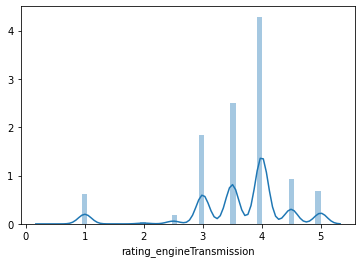

In [84]:
sns.distplot(data['rating_engineTransmission'])

In [85]:
data['rating_engineTransmission'].value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

In [40]:
sns.boxplot(x='odometer_reading', y="rating_engineTransmission", data=data)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1322c1b80> (for post_execute):


KeyboardInterrupt: 

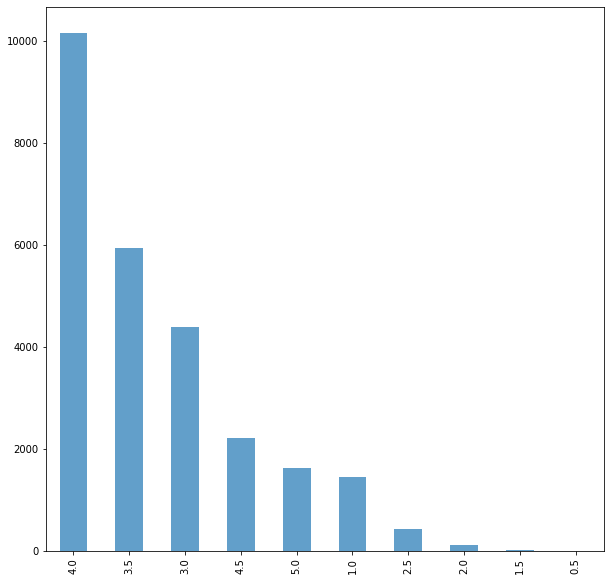

In [45]:
import matplotlib.pyplot as plt
df['rating_engineTransmission'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [46]:
df['rating_engineTransmission'].value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

### Outlier Detection and Removal

In [ ]:
Sometimes it's